In [10]:
# ライブラリのインストール（必要に応じて）
!pip install pandas numpy scikit-learn

# ライブラリのインポート
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [11]:
# データの読み込み
train_df = pd.read_csv('../data_in/01_BankCustomerTargeting_train.csv')
test_df = pd.read_csv('../data_in/01_BankCustomerTargeting_test.csv')

In [12]:
# 欠損値の確認
print(train_df.isnull().sum())
print(test_df.isnull().sum())

# カテゴリ変数のエンコーディング
label_encoders = {}
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for column in categorical_columns:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])
    test_df[column] = le.transform(test_df[column])
    label_encoders[column] = le

# 特徴量とターゲット変数の分割
X = train_df.drop(columns=['id', 'y'])
y = train_df['y']
X_test = test_df.drop(columns=['id'])

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64


In [13]:
# データの分割
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# モデルの構築
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 検証データでの予測と評価
y_val_pred = model.predict_proba(X_val)[:, 1]
auc_score = roc_auc_score(y_val, y_val_pred)
print(f'AUC Score: {auc_score}')


AUC Score: 0.926617143102579


In [14]:
# テストデータでの予測
y_test_pred = model.predict_proba(X_test)[:, 1]

# 予測結果の保存
submission = pd.DataFrame({
    'id': test_df['id'],
    'y': y_test_pred
})

submission.to_csv('../data_out/submission.csv', index=False, header=False)

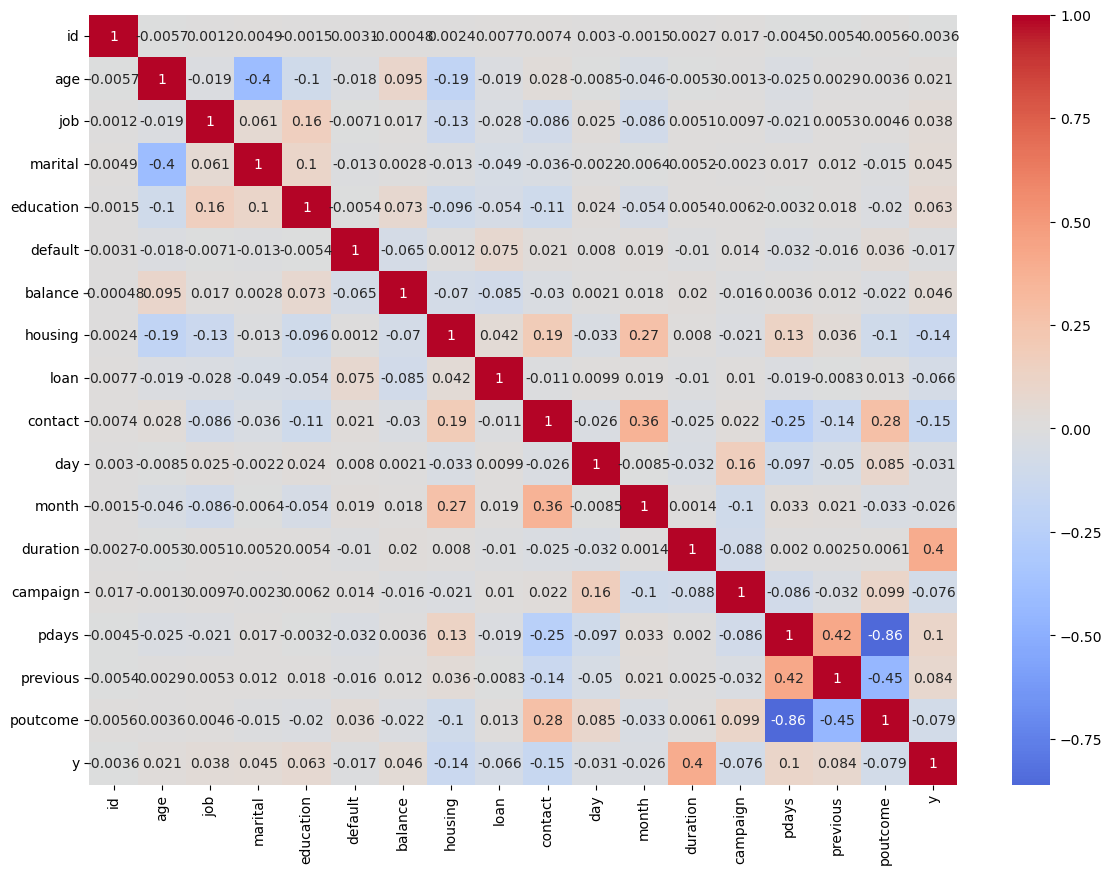

y            1.000000
duration     0.401390
pdays        0.100930
previous     0.083825
education    0.062822
balance      0.045826
marital      0.045479
job          0.037901
age          0.020892
id          -0.003555
default     -0.017005
month       -0.025569
day         -0.031058
loan        -0.065630
campaign    -0.076118
poutcome    -0.079037
housing     -0.140307
contact     -0.150016
Name: y, dtype: float64


In [15]:
# yと他の変数の相関を調べる
import seaborn as sns
import matplotlib.pyplot as plt

for column in categorical_columns:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])
    label_encoders[column] = le

# 相関行列の計算
correlation_matrix = train_df.corr()

# 相関行列の表示
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

# 目的変数との相関を抽出
target_correlation = correlation_matrix['y'].sort_values(ascending=False)
print(target_correlation)
